### Librerias

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import linear_model 
from sklearn import tree 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron 
from sklearn import neural_network 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import explained_variance_score, make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold # cross validation
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit # cross validation 

### Plot de curvas de aprendizaje

In [2]:
# Fnción obtenida del tutorial de scikit-learn
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=10, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Ejemplos de entrenamiento")
    plt.ylabel("Porcentaje de acierto")
    # el cv es cross validation
    # se calcula con la libreria de ShuffleSplit
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Porcentaje de acierto en entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Porcentaje en el Cross-validation")

    plt.legend(loc="best")
    return(plt)

In [3]:
df = pd.read_csv("list.csv", delimiter=',')

In [4]:
y = df['Vulnerable?'].values
y

array([ True,  True,  True, ...,  True,  True,  True])

In [5]:
X = df.drop(columns='Vulnerable?', axis=1)
X = X.values
X

array([[ 7,  0,  0, ..., -1, -1, -1],
       [ 7,  0,  0, ..., -1, -1, -1],
       [ 7,  0,  0, ..., -1, -1, -1],
       ...,
       [ 7,  0,  0, ..., -1, -1, -1],
       [ 3,  0,  0, ..., -1, -1, -1],
       [ 7,  0,  0, ..., -1, -1, -1]])

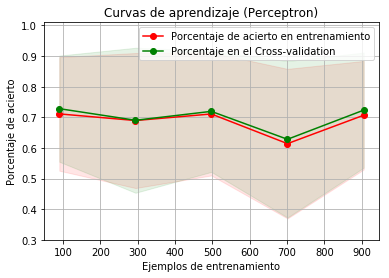

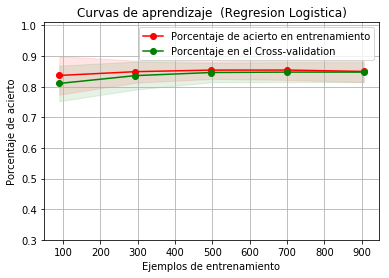

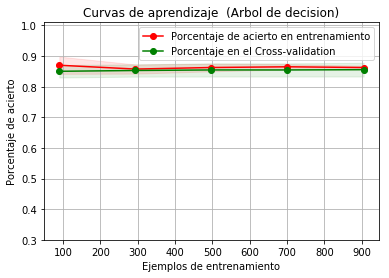

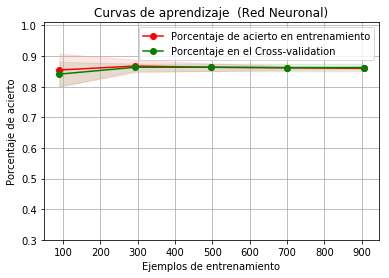

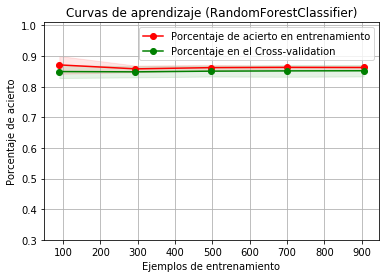

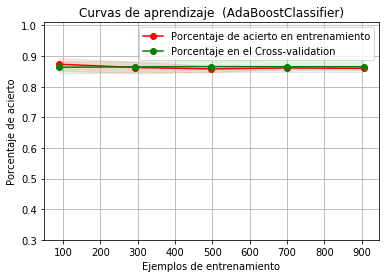

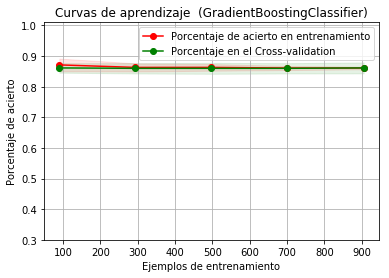

In [6]:
cv = ShuffleSplit(n_splits=10, test_size=0.2)

title = "Curvas de aprendizaje (Perceptron)"
percep=linear_model.Perceptron()
plot_learning_curve(percep, title, X, y, (0.3, 1.01), cv=cv, n_jobs=10)

title = "Curvas de aprendizaje  (Regresion Logistica)"
lr = linear_model.LogisticRegression()
plot_learning_curve(lr, title, X, y, (0.3, 1.01), cv=cv, n_jobs=10)


title = "Curvas de aprendizaje  (Arbol de decision)"
dt = tree.DecisionTreeClassifier()
plot_learning_curve(dt, title, X, y, (0.3, 1.01), cv=cv, n_jobs=10)

title = "Curvas de aprendizaje  (Red Neuronal)"
mlp = neural_network.MLPClassifier()
plot_learning_curve(mlp, title, X, y, (0.3, 1.01), cv=cv, n_jobs=10)

title = "Curvas de aprendizaje (RandomForestClassifier)"
rf = RandomForestClassifier()
plot_learning_curve(rf, title, X, y, (0.3, 1.01), cv=cv, n_jobs=10)


title = "Curvas de aprendizaje  (AdaBoostClassifier)"
ab = AdaBoostClassifier()
plot_learning_curve(ab, title, X, y, (0.3, 1.01), cv=cv, n_jobs=10)


title = "Curvas de aprendizaje  (GradientBoostingClassifier)"
gb = GradientBoostingClassifier()
plot_learning_curve(gb, title, X, y, (0.3, 1.01), cv=cv, n_jobs=10)


plt.show()

### Curvas ROC

In [7]:
def false_positives(model,data_set,target,clase_a_estudiar):
    predictions=model.predict(data_set)
    real=target
    pos=[] 
    # cuando la prediccion sea distinto de real y la prediccion sea la clase a estidiar
    for i in range(len(real)):
        if (real[i]!=predictions[i] & predictions[i]==clase_a_estudiar):
            pos.append(1)
    negative=sum(pos)
    #negative_rate=negative/len(data_set)
    return(negative)    



def true_positives(model,data_set,target,clase_a_estudiar):
    predictions=model.predict(data_set)
    real=target
    pos=[]
    for i in range(len(real)):
        if (real[i]==predictions[i] & predictions[i]==clase_a_estudiar):
            pos.append(1)
    positive=sum(pos)   
    #positive_rate=positive/len(data_set)
    return(positive)
    
    
# tiene como output el punto roc
# 
def roc(model,modelo,data_set,target,clase_a_estudiar):
    tpp=true_positives(model,data_set,target,clase_a_estudiar)
    fpp=false_positives(model,data_set,target,clase_a_estudiar)
    tp=0
    fp=0
    print('Curva ROC para %s' % modelo)
    print("True positives: %d" % tpp)
    print("False Positives: %d" %fpp)
    tot=tpp+fpp
    if tot==0:
        print("Para el modelo %s la suma de true_positives y false_positives es 0" % modelo)
    else:
        tp=tpp/tot
        fp=fpp/tot
        plt.figure()
        plt.title('Curva ROC para %s' % modelo)
        plt.xlabel("Ratio de Falsos Positivos")
        plt.ylabel("Ratio de Verdaderos Positivos")
        plt.plot([0,fp,1],[0,tp,1],'r--')
        plt.show()
    print("\n")
    return(tp,fp)

In [8]:
# se separan los datos en train y data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [9]:
# se entrenan los modelos
percep.fit(X_train,y_train)
lr.fit(X_train,y_train)
dt.fit(X_train,y_train)
mlp.fit(X_train,y_train)
rf.fit(X_train,y_train)
ab.fit(X_train,y_train)
gb.fit(X_train,y_train)

/home/flavio-riasc/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/flavio-riasc/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/flavio-riasc/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/flavio-riasc/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [10]:
roc(percep,'Perceptrón', X_test, y_test, 2)

Curva ROC para Perceptrón
True positives: 0
False Positives: 0
Para el modelo Perceptrón la suma de true_positives y false_positives es 0




(0, 0)

In [ ]:
###############
roc(percep,'Perceptrón', X_test, y_test, 2)
roc(lr, 'Regresón Logística', X_test, y_test, 2)
roc(dt,'Árbol de Decisión', X_test, y_test, 2)
roc(mlp, 'Red Neuronal', X_test, y_test, 2)
roc(rf,'RandomForestClassifier', X_test, y_test, 2)
roc(ab, 'AdaBoostClassifier',X_test, y_test, 2)
roc(gb,'GradientBoostingClassifier', X_test, y_test, 2)